In [7]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Content Dataset

In [6]:
# Read Content.csv file
content = pd.read_csv(r"C:\Users\ffah\Desktop\Content.csv")
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


### Explore the Content Dataset

In [4]:
content.shape

(1000, 6)

In [5]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [12]:
content.isnull().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

### Clean Content Dataset

In [13]:
# Remoev unneccessary column: 'URL' and 'User ID' (axis = 1 refers to column)
content = content.drop(['URL', 'User ID'], axis=1)
content.head()

,Unnamed: 0,Content ID,Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


##### Some of the items in the 'Category' column contain double quotes, as shown in the output below, so they should be removed

In [17]:
content.loc[49:53, ['Category']]

,Category
49,tennis
50,"""culture"""
51,travel
52,science
53,technology


In [18]:
# Removing double quotes from the 'Category' column
content['Category'] = content['Category'].str.replace('"', '')
content.head()

,Unnamed: 0,Content ID,Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [20]:
# Check the outputs again
content.loc[49:53, ['Category']]

,Category
49,tennis
50,culture
51,travel
52,science
53,technology


##### Convert items in the 'Category' column to lowercase
- This helps with finding and organizing information, and it's simpler than working with a mix of big and small letters

In [22]:
# Preview the items
# e.g. items at index 35 and 38 are identical, except that one of them starts with an uppercase letter
content.loc[35:38, ['Category']]

,Category
35,Animals
36,technology
37,healthy eating
38,animals


In [24]:
# lowercase
content['Category'] = content['Category'].str.lower()
content.loc[35:38, ['Category']]

,Category
35,animals
36,technology
37,healthy eating
38,animals


##### Rename the 'Type' column to 'Content Type'

In [27]:
content.rename(columns={'Type': 'Content Type'}, inplace=True)
content.head()

,Unnamed: 0,Content ID,Content Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


# Reactions Dataset

In [28]:
# Read Reactions.csv file
reaction = pd.read_csv(r"C:\Users\ffah\Desktop\Reactions.csv")
reaction.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


### Explore the Reactions Dataset

In [29]:
reaction.shape

(25553, 5)

In [30]:
reaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [32]:
reaction.isnull().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

### Clean Reactions Dataset

##### Drop 'User ID' column

In [33]:
reaction = reaction.drop('User ID', axis=1)
reaction.head()

,Unnamed: 0,Content ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01


##### Rename 'Type' to 'Content Type'

In [34]:
reaction.rename(columns={'Type': 'Reaction Type'}, inplace=True)
reaction.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01


##### Delete missing value (NA) in 'Reaction Type' column

In [35]:
reaction.dropna(subset=['Reaction Type'], inplace=True)
reaction.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


# Join 'content' and 'reaction' datasets
Up until now, two cleaned datasets have been prepared for the next step, which involves merging them into a single dataset

In [37]:
# Join 'content' and 'reaction' dataframe on 'Content ID' column (primary key)
joindata = pd.merge(content, reaction[['Content ID', 'Reaction Type', 'Datetime']], on='Content ID')
joindata.head()

,Unnamed: 0,Content ID,Content Type,Category,Reaction Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50
1,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51
2,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,scared,2021-04-18 05:13:58
3,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01
4,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2020-08-23 12:25:58


# Reaction Types dataset

In [40]:
# Read ReactionTypes.csv file
reactiontypes = pd.read_csv(r"C:\Users\ffah\Desktop\ReactionTypes.csv")
reactiontypes.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [41]:
# Explore 'reactiontypes' dataset
reactiontypes.shape

(16, 4)

##### Rename 'Type' to 'Reaction Type'

In [43]:
reactiontypes.rename(columns={'Type': 'Reaction Type'}, inplace=True)
reactiontypes

,Unnamed: 0,Reaction Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


# Map sentiment and score based on reaction type
Generate 'Sentiment' and 'Score' columns within the 'joindata' dataset by mapping the 'Reaction Type' column based on the data provided in the 'reactiontypes' dataset

In [44]:
# Preview the 'joindata' dataset again
joindata.head()

,Unnamed: 0,Content ID,Content Type,Category,Reaction Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50
1,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51
2,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,scared,2021-04-18 05:13:58
3,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01
4,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2020-08-23 12:25:58


In [45]:
# Map 'Sentiment' values based on 'Reaction Type' in the 'joindata' dataset
joindata['Sentiment'] = joindata['Reaction Type'].map(reactiontypes.set_index('Reaction Type')['Sentiment'])
joindata.head()

,Unnamed: 0,Content ID,Content Type,Category,Reaction Type,Datetime,Sentiment
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative
1,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51,negative
2,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,scared,2021-04-18 05:13:58,negative
3,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative
4,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2020-08-23 12:25:58,positive


In [46]:
# Map 'Score' values based on 'Reaction Type' in the 'joindata' dataset
joindata['Score'] = joindata['Reaction Type'].map(reactiontypes.set_index('Reaction Type')['Score'])
joindata.head()

,Unnamed: 0,Content ID,Content Type,Category,Reaction Type,Datetime,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0
1,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51,negative,10
2,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,scared,2021-04-18 05:13:58,negative,15
3,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative,0
4,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2020-08-23 12:25:58,positive,30


# Extract Preliminary Insights

### - Calculate 'Score' group by 'Category' in DESC order

In [77]:
# Calculate the 'Score', group by 'Category', and show the top 5 results in descending order
overall_score = joindata.groupby('Category')['Score'].sum().reset_index()
overall_score = overall_score.sort_values(by='Score', ascending=False)
overall_score

,Category,Score
0,animals,74965
9,science,71168
7,healthy eating,69339
12,technology,68738
6,food,66676
2,culture,66579
14,travel,64880
1,cooking,64756
10,soccer,57783
4,education,57436


In [76]:
top5 = overall_score.head(5)
top5

,Category,Score
0,animals,74965
9,science,71168
7,healthy eating,69339
12,technology,68738
6,food,66676


---

The result of exploring the top 5 popular post categories includes **Animals**, **Science**, **Healthy Eating**, **Technology**, and **Food**. 

Animals lead with a substantial score of 74,965 (21.4%), followed closely by Science at 71,168 (20.3%), highlighting a keen interest in educational and discovery content. Healthy Eating and Technology share similar engagement levels, scoring 69,339 (19.8%) and 68,738 (19.6%) respectively, showcasing a health-conscious and tech-savvy community. The final category to secure a place in this top 5 ranking is Food, with a score of 66,676 (19%).

The closely aligned scores and percentage shares in these top 5 popular categories suggest a diverse range of interests among individuals, with no distinct inclination towards any particular direction. This indicates a well-rounded and comprehensive engagement from the audience across various categories.

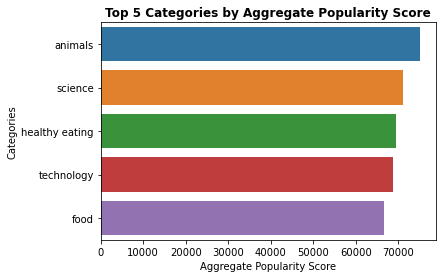

In [95]:
sns.barplot(x='Score', y='Category', data=top5)
plt.xlabel('Aggregate Popularity Score')
plt.ylabel('Categories')
plt.title('Top 5 Categories by Aggregate Popularity Score', fontweight='bold')
plt.show()

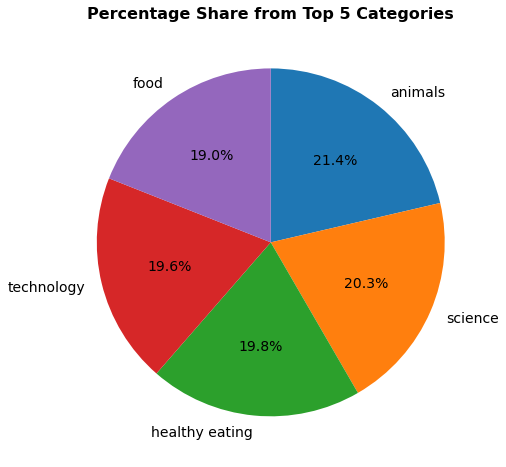

In [96]:
# Setting the figure size
plt.figure(figsize=(8, 8))

# Create a pie chart
plt.pie(top5['Score'], labels=top5['Category'], autopct='%1.1f%%', startangle=90, counterclock=False, textprops={'fontsize': 14})

# Setting title
plt.title('Percentage Share from Top 5 Categories', fontsize=16, fontweight='bold')

plt.show()

---

### - Count sentiment (-,0,+) for each category

In [49]:
sentiment_counts = joindata.groupby(['Category', 'Sentiment']).size().unstack(fill_value=0)
sentiment_counts

Sentiment,negative,neutral,positive
Category,,,
animals,618,229,1050
cooking,550,182,932
culture,523,210,943
dogs,409,185,744
education,430,188,815
fitness,441,168,786
food,544,212,943
healthy eating,520,212,985
public speaking,363,142,712


### - Count the number of unique items in 'Category'

In [50]:
len(joindata['Category'].unique())

16

### - Count the number of reactions for the most popular category ('animals' posts)

In [53]:
joindata.loc[joindata['Category'] == 'animals', 'Reaction Type'].count()

1897

### - Find the month with the most posts

In [55]:
# Extract month from 'Datetime' column
joindata['Month'] = pd.to_datetime(joindata['Datetime']).dt.month
joindata.head()

,Unnamed: 0,Content ID,Content Type,Category,Reaction Type,Datetime,Sentiment,Score,Month
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0,11
1,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51,negative,10,6
2,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,scared,2021-04-18 05:13:58,negative,15,4
3,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative,0,1
4,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2020-08-23 12:25:58,positive,30,8


In [56]:
# Replace numeric values to strings
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

joindata['Month'] = joindata['Month'].replace(month_names)

joindata.head()

,Unnamed: 0,Content ID,Content Type,Category,Reaction Type,Datetime,Sentiment,Score,Month
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0,November
1,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51,negative,10,June
2,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,scared,2021-04-18 05:13:58,negative,15,April
3,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative,0,January
4,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2020-08-23 12:25:58,positive,30,August


### - Count the number of posts for each month

In [72]:
joindata['Month'].value_counts()

May          2138
January      2126
August       2114
December     2092
July         2070
October      2056
November     2034
September    2022
June         2021
March        2012
April        1974
February     1914
Name: Month, dtype: int64

In [70]:
print("\nMonth with the most posts is:", joindata['Month'].value_counts().idxmax())


Month with the most posts is: May
